# Blending Tank Simulation

### Initialize Python Workspace

Unlike Matlab, in Python it is always necessary to import the functions and libraries that you intend to use. In this case we import the complete `pylab` library, and the function `odeint` for integrating systems of differential equations from the `scipy` library.  The command `%matplotlib inline` causes graphic commands to produce results directly within the notebook output cells.

In [17]:
from pylab import *
from scipy.integrate import odeint
%matplotlib inline

## Basic Simulation of the Blending Tank

\begin{align*}
\frac{dV}{dt} & = \frac{1}{\rho}(w_1 + w_2 - w)\\
\frac{dx}{dt} & = \frac{1}{\rho V}(w_1 (x_1 - x) + w_2 (x_2 - x))
\end{align*}

#### Step 1. Establish Parameter Values

In [55]:
rho = 900.0  # density, kg/m**3

w1 = 500.0   # stream 1, kg/min
w2 = 200.0   # stream 2, kg/min
w = w1 + w2  # set outflow equal to sum of inflows

x1 = 0.4     # composition stream 1, mass fraction
x2 = 0.75    # composition stream 2, mass fraction

#### Step 2. Write a function to compute the RHS's of the Differential Equations

In [56]:
def func(y,t):
    V,x = y
    return [(w1 + w2 - w)/rho, (w1*(x1-x)+w2*(x2-x))/(rho*V)]

#### Step 3. Set the Initial Conditions

In [57]:
V = 2.0      # volume, cubic meters
x = 0.0      # composition, mass fraction

#### Step 4. Integrate the Differential Equations

In [58]:
t = linspace(0,10.0)
y = odeint(func,[V,x],t)

#### Step 5. Visualize the Solution

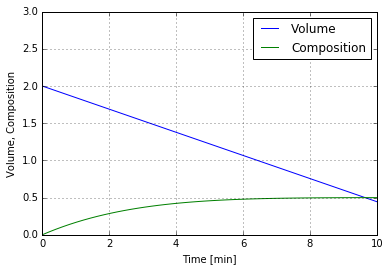

In [59]:
plot(t,y)
xlabel('Time [min]')
ylabel('Volume, Composition')
legend(['Volume','Composition'])
ylim(0,3)
grid()
savefig('BlendingTankStartUp.png')

## Steady State Analysis

The blending tank is a system with two state variables (volume and composition). Suppose a mechanism is put in place to force

$$w = w_1 + w_2$$

The mechanism could involve the installation of an overflow weir, level controller, or some other device to force a balance between the outflow and total inflows.  In this case,

$$\frac{dV}{dt} = 0$$

which means volume is at *steady state*.  In that case there is just one remaining differential equation

$$\frac{dx}{dt} = \frac{1}{\rho V}( w_1(x_1 - x) + w_1(x_2 - x))$$

In [42]:
rho = 900.0  # density, kg/m**3

w1 = 500.0   # stream 1, kg/min
w2 = 200.0   # stream 2, kg/min
w = w1 + w2  # set outflow equal to sum of inflows

x1 = 0.4     # composition stream 1, mass fraction
x2 = 0.75    # composition stream 2, mass fraction

V = 2.0
x = (w1*x1 + w2*x2)/(w1 + w2)
print x

0.5


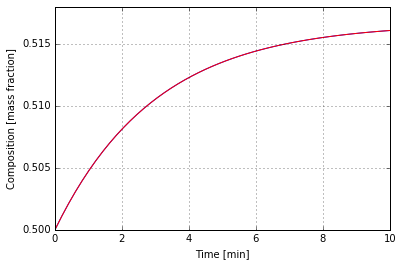

In [49]:
t = linspace(0,10.0)

w1 = 400

def func(x,t):
    return (w1*(x1-x) + w2*(x2-x))/(rho*V)

x_ode = odeint(func,x,t)

a = -(w1+w2)/(rho*V)
b = (w1*x1 + w2*x2)/(rho*V)
x_exp = x*exp(a*t) +(b/a)*(exp(a*t)-1)

plot(t,x_ode,'b')
plot(t,x_exp,'r')
xlabel('Time [min]')
ylabel('Composition [mass fraction]')
grid()